Final Assignment: Statistics for Data Science with Python.

Name: Tafese Ashine

Load Dataset

In [4]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
import statsmodels.api as sm

In [5]:
from js import fetch
import io
boston = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv"
resp = await fetch(boston)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

In [7]:
print("The first 2 rows of the dataframe") 
boston_df.head(2)

The first 2 rows of the dataframe


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6


Generate Descriptive Statistics and Visualizations:

Question:

1. For the 'Median value of owner-occupied homes' provide a boxplot

Text(0.5, 1.0, 'Owner-occupied homes')

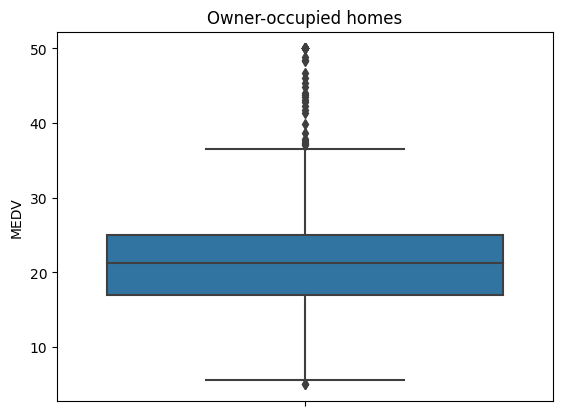

In [9]:
ax = sns.boxplot(y="MEDV", data=boston_df)
ax.set_title('Owner-occupied homes')

The depicted boxplot showcases the median value of the variable MEDV, along with any outliers present in the data.

2. Provide a  bar plot for the Charles river variable

Text(0.5, 1.0, 'Number of homes near the Charles River')

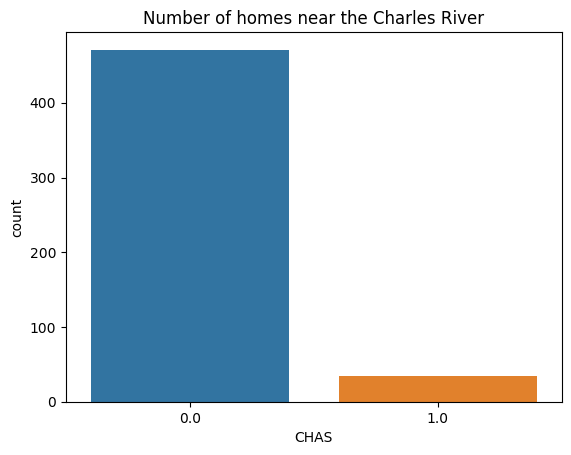

In [10]:
ax1 = sns.countplot(x = 'CHAS', data = boston_df)
ax1.set_title('Number of homes near the Charles River')

The bar plot indicates that the majority of houses are situated at a distance from the Charles River and are not in close proximity to it.

3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [11]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

Text(0.5, 1.0, 'Median value of owner-occupied homes per Age Group')

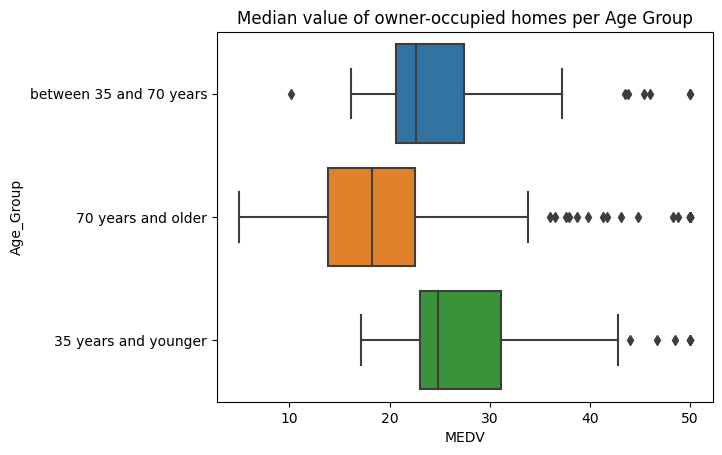

In [13]:
ax2 = sns.boxplot(x = 'MEDV', y = 'Age_Group', data = boston_df)
ax2.set_title('Median value of owner-occupied homes per Age Group')

Based on the above boxplot, it is evident that there is a positive correlation between the median value of owner-occupied homes and lower Age, indicating that, on average, homes with lower Age tend to have higher median values.

4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Nitric oxide concentration per proportion of non-retail business acres per town')

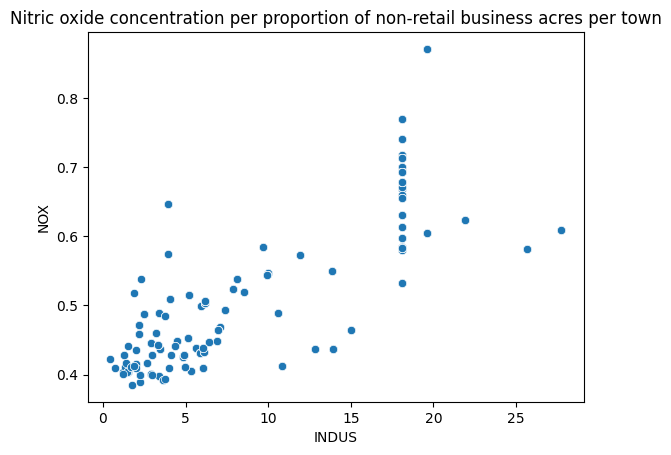

In [14]:
ax3 = sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df)
ax3.set_title('Nitric oxide concentration per proportion of non-retail business acres per town')

In the scatter plot's bottom-left section, we observe a robust association between low Nitric oxide concentration and a low proportion of non-retail business acres per town. Typically, a higher proportion of non-retail business acres per town results in an elevated concentration of Nitric oxide.

5. Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Pupil to teacher ratio per town')

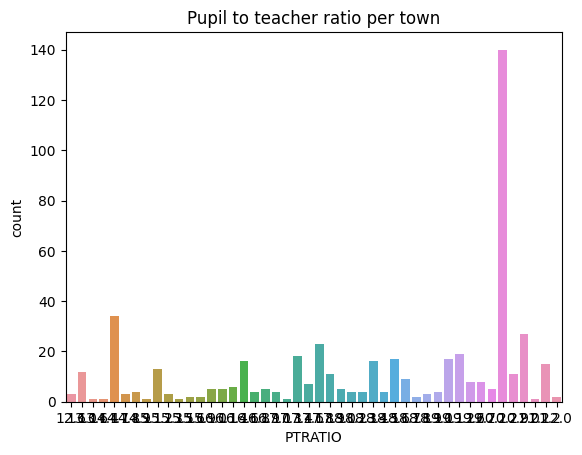

In [15]:
ax4 = sns.countplot(x = 'PTRATIO', data = boston_df)
ax4.set_title('Pupil to teacher ratio per town')

The histogram above, representing the pupil-to-teacher ratio variable, is not normal, and it contains outliers.

Use the appropriate tests to answer the questions provided:

Question:

1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis:

Null Hypothesis (Ho): There's no significant difference in median value between houses bounded and not bounded by the Charles River

Alternative Hypothesis (Ha): There's a significant difference in median value between houses bounded and not bounded by the Charles River

In [17]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_T'] = 'FAR'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_T'] = 'NEAR'
boston_df.head(3)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Group,CHAS_T
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years,FAR
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older,FAR
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years,FAR


In [18]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV'], 
                      boston_df[boston_df['CHAS_T'] == 'NEAR']['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Since the p-value is less than 0.05, we can reject the Null Hypothesis (Ho), indicating that there is a statistically significant difference in median value between houses near the Charles River and houses located farther away.

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis

Null Hypotesis (Ho): There isn't statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

Alternative Hypothesis (Ha): There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

In [19]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


Since the p-value is less than 0.05, we reject the Null Hypothesis, indicating a statistically significant difference in median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940.

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis

Null Hypothesis: Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town

Alternative Hypothesis: Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town

In [20]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209189, pvalue=7.913361061211254e-98)

With a Pearson Coefficient of 0.76365 and a p-value less than 0.05, we reject the Null Hypothesis, demonstrating a positive correlation between Nitric oxide concentration and the proportion of non-retail business acres per town. This positive relationship is further corroborated by the Scatter Plot (Question 4).

4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [22]:
x = boston_df['DIS']
y = boston_df['MEDV']
x1 = sm.add_constant(x)
model = sm.OLS(y, x1).fit()
predisction = model.predict(x1)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        05:46:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient of 1.0916 for the variable DIS suggests that for each additional unit increase in the weighted distance to the 5 employment centers in Boston, the median value of owner-occupied homes increases by 1.0916 units.